ANOVA
* https://partrita.github.io/posts/ANOVA-python/ (KOR)
* https://ggbaker.ca/data-science/content/stats-tests.html (ENG)

ANOVA (ANalysis Of VAriance; 분산 분석)은 여러 그룹간의 평균의 차이가 통계적으로 유의미 한지를 판단하기 위한 시험법

In [2]:
import scipy.stats as stats
import pandas as pd
import urllib
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

The mean value is the same, but the variance values are different, so the overall data looks completely different.

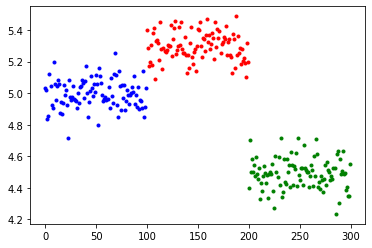

In [3]:
centers = [5,5.3,4.5]
std = 0.1
colors = 'brg'

data_1 = []
for i in range(3):
    data_1.append(stats.norm(centers[i], std).rvs(100))
    plt.plot(np.arange(len(data_1[i]))+i*len(data_1[0]),data_1[i], '.', color = colors[i])

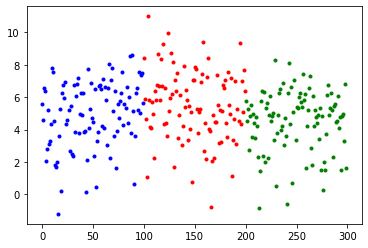

In [4]:
std_2 = 2

data_2 = []
for i in range(3):
    data_2.append(stats.norm(centers[i], std_2).rvs(100))
    plt.plot(np.arange(len(data_1[i]))+i*len(data_2[0]), data_2[i], '.', color = colors[i])

분산분석에는 여러 종류가 있지만, 여기서는 일원분산분석(One-way ANOVA)과 이원분산분석(Two-way ANOVA)

일원분산분석(One-way ANOVA)
종속변인은 1개이며, 독립변인의 집단도 1개인 경우입니다. 한가지 변수의 변화가 결과 변수에 미치는 영향을 보기 위해 사용됩니다.

파이썬에서 One-way ANOVA 분석은 scipy.stats이나 statsmodel 라이브러리를 이용해서 할 수 있습니다.

statsmodel 라이브러리가 좀 더 많고 규격화된 정보를 제공합니다.

예시 데이터(Altman 910) 설명
22명의 심장 우회 수술을 받은 환자를 다음의 3가지 그룹으로 나누었습니다.

Group I: 50% 아산화 질소(nitrous oxide)와 50%의 산소(oxygen) 혼합물을 24시간 동안 흡입한 환자
Group II: 50% 아산화 질소와 50% 산소 혼합물을 수술 받는 동안만 흡입한 환자
Group III: 아산화 질소 없이 오직 35-50%의 산소만 24시간동안 처리한 환자
그런 다음 적혈구의 엽산 수치를 24시간 이후에 측정하였습니다.

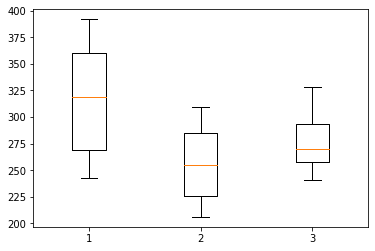

In [5]:
# url로 데이터 얻어오기
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[:,1]==1,0]
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

# matplotlib plotting
plot_data = [group1, group2, group3]
ax = plt.boxplot(plot_data)
plt.show()

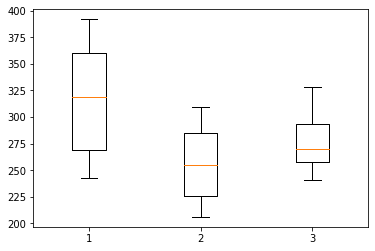

In [6]:
# getting the data
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[:,1]==1,0]
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

# matplotlib plotting
plot_data = [group1, group2, group3]
ax = plt.boxplot(plot_data)
plt.show()

Normality check

In [7]:
# Example of the Shapiro-Wilk Normality Test
from scipy.stats import shapiro

stat, p = shapiro(group1)
print('group1 stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')
    
stat, p = shapiro(group2)
print('group2 stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat, p = shapiro(group3)
print('group3 stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

group1 stat=0.907, p=0.334
Probably Gaussian
group2 stat=0.947, p=0.656
Probably Gaussian
group3 stat=0.964, p=0.832
Probably Gaussian


In [9]:
from scipy.stats import bartlett

bartlett(group1, group2, group3)

BartlettResult(statistic=2.095059428100749, pvalue=0.3508032640105389)

In [10]:
F_statistic, pVal = stats.f_oneway(group1, group2, group3)

print('One-way ANOVA analysis result with Altman 910: F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('Due to the small enough p-value (p<0.05), the mean values of the groups are statistically significantly different.')

One-way ANOVA analysis result with Altman 910: F=3.7, p=0.04359
Due to the small enough p-value (p<0.05), the mean values of the groups are statistically significantly different.


In [11]:
import warnings
warnings.filterwarnings('ignore')

df = pd.DataFrame(data, columns=['value', 'treatment'])    
df

,value,treatment
0,243.0,1.0
1,251.0,1.0
2,275.0,1.0
3,291.0,1.0
4,347.0,1.0
5,354.0,1.0
6,380.0,1.0
7,392.0,1.0
8,206.0,2.0
9,210.0,2.0


In [12]:
# the "C" indicates categorical data
model = ols('value ~ C(treatment)', df).fit()

print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


Results
* The results of one-way ANOVA test indicate that there exists a significant difference among groups.

# Two Way ANOVA

Example data (altman_12_6)
Fetal head size measurement data.

4 observers measured on 3 fetuses.

Through this, it is checked whether the fetal head size measurement data is reproducible by ultrasound.Example data (altman_12_6)

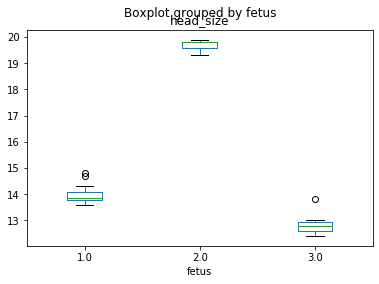

In [13]:
inFile = 'altman_12_6.txt'
url_base = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/'
url = url_base + inFile
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Bring them in dataframe-format
df = pd.DataFrame(data, columns=['head_size', 'fetus', 'observer'])
# df.tail()

# plotting the fetal head size
df.boxplot(column = 'head_size', by='fetus' , grid = False)

In [18]:
from scipy.stats import levene # needed


levene(df.loc[df['fetus'] == 1.0]['head_size'], df.loc[df['fetus'] == 2.0]['head_size'], df.loc[df['fetus'] == 3.0]['head_size'])

LeveneResult(statistic=1.1196353968856851, pvalue=0.33848228478565656)

In [19]:
levene(df.loc[df['observer'] == 1.0]['head_size'], 
       df.loc[df['observer'] == 2.0]['head_size'], 
       df.loc[df['observer'] == 3.0]['head_size'],
       df.loc[df['observer'] == 4.0]['head_size'])

LeveneResult(statistic=0.005072456494316884, pvalue=0.9994916853192689)

In [20]:
print(shapiro(df.loc[df['fetus'] == 1.0]['head_size']))
print(shapiro(df.loc[df['fetus'] == 2.0]['head_size']))
print(shapiro(df.loc[df['fetus'] == 3.0]['head_size']))

(0.8241909742355347, 0.017885753884911537)
(0.8339231014251709, 0.023375093936920166)
(0.8402673602104187, 0.027895430102944374)


In [21]:
print(shapiro(df.loc[df['observer'] == 1.0]['head_size']))
print(shapiro(df.loc[df['observer'] == 2.0]['head_size']))
print(shapiro(df.loc[df['observer'] == 3.0]['head_size']))
print(shapiro(df.loc[df['observer'] == 4.0]['head_size']))

(0.7795726656913757, 0.011908620595932007)
(0.7409945726394653, 0.0042620557360351086)
(0.7411699891090393, 0.004282097797840834)
(0.7461882829666138, 0.004896864295005798)


In [22]:
# Example of the D'Agostino's K^2 Normality Test
from scipy.stats import normaltest

print(normaltest(df.loc[df['fetus'] == 1.0]['head_size']))
print(normaltest(df.loc[df['fetus'] == 2.0]['head_size']))
print(normaltest(df.loc[df['fetus'] == 3.0]['head_size']))

print(normaltest(df.loc[df['observer'] == 1.0]['head_size']))
print(normaltest(df.loc[df['observer'] == 2.0]['head_size']))
print(normaltest(df.loc[df['observer'] == 3.0]['head_size']))
print(normaltest(df.loc[df['observer'] == 4.0]['head_size']))

NormaltestResult(statistic=4.211447767362128, pvalue=0.1217575040901957)
NormaltestResult(statistic=3.4876101155543804, pvalue=0.17485380437445605)
NormaltestResult(statistic=12.290508004046057, pvalue=0.002143631336060972)
NormaltestResult(statistic=3.329429227429597, pvalue=0.18924465810613922)
NormaltestResult(statistic=3.4648932752534423, pvalue=0.17685118944473924)
NormaltestResult(statistic=3.5102316282080817, pvalue=0.1728872183539178)
NormaltestResult(statistic=3.5024842174933206, pvalue=0.17355823131204462)


Results
* Homogeneity of variance is satisfied.
* Although normality of each group is not satisfied, ANOVA is still robust for that.

## ANOVA test
### Only statsmodel can be used for two-way ANOVA.

In [23]:
formula = 'head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = ols(formula, df).fit()
print(anova_lm(lm))

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


Results
* P-value is over 0.05. Therefore, the null hypothesis is not rejected. In other words, there is no correlation between the head size of the measurer and the fetus. The head size is constant even if the person measuring is different.

* In conclusion, the fetal head size measured by ultrasound is reliable.

## 4. Post-hoc analysis

### Tukey' HSD test

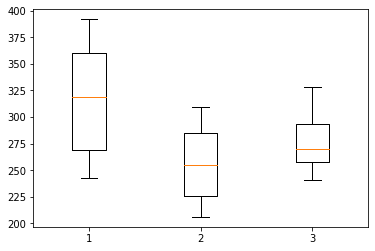

In [24]:
import pandas as pd
import urllib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# get the data
url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[:,1]==1,0]
group2 = data[data[:,1]==2,0]
group3 = data[data[:,1]==3,0]

# dataframing
df = pd.DataFrame(data,columns=['value', 'treatment']).set_index('treatment')

# plot the data
plot_data = [group1, group2, group3]
ax = plt.boxplot(plot_data)
plt.show()

In [25]:
F_statistic, pVal = stats.f_oneway(group1, group2, group3)

print('One-way ANOVA analysis result with Altman 910: F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))
if pVal < 0.05:
    print('Due to the small enough p-value (p<0.05), the mean values of the groups are statistically significantly different.')

One-way ANOVA analysis result with Altman 910: F=3.7, p=0.04359
Due to the small enough p-value (p<0.05), the mean values of the groups are statistically significantly different.


In [26]:
df.head()

,value
treatment,
1.0,243.0
1.0,251.0
1.0,275.0
1.0,291.0
1.0,347.0


In [27]:
df2 = df.reset_index()
df2.head()

,treatment,value
0,1.0,243.0
1,1.0,251.0
2,1.0,275.0
3,1.0,291.0
4,1.0,347.0


In [28]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

posthoc = pairwise_tukeyhsd(df2['value'], df2['treatment'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
   1.0    2.0 -60.1806 0.0354 -116.6056 -3.7555   True
   1.0    3.0  -38.625 0.3217 -104.8246 27.5746  False
   2.0    3.0  21.5556 0.6706  -43.2141 86.3252  False
------------------------------------------------------


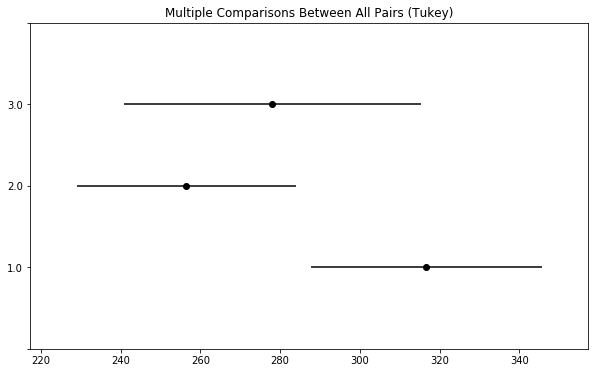

In [29]:
fig = posthoc.plot_simultaneous()

As you can see in the figure, you can see that groups 1.0 and 2.0 do not overlap each other.

On the other hand, in other cases (1.0 vs 3.0 and 2.0 vs 3.0), there are no significant differences because they actually overlap.